# IBM Q Exercise 3: Measurement of two (entangled) qubits
### Written by Anna Liv Paludan Bjerregaard

In this exercise we will study *entanglement* which happens when measuring one qubit would influence the measurement of another! We start again by constructing a circuit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

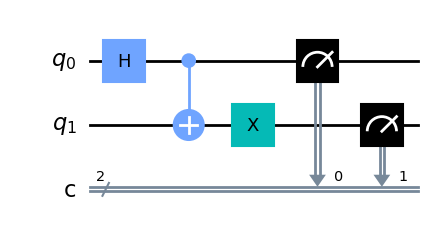

In [2]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

**Exercise:** Show that the qubits are in the state
$$\frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)\:.$$
Is this an entangled state?

*Hint: The line between $q_0$ and $q_1$ is a CNOT operator (definition 13 in the notes)*

We've set up the circuit such that $q_0$ is measured before $q_1$. If the measurement of $q_0$ returns $0$, what will be the measurement of $q_1$?

In [3]:
sim = True
N_measure = 1024

{'|00>': 0, '|10>': 503, '|01>': 521, '|11>': 0}


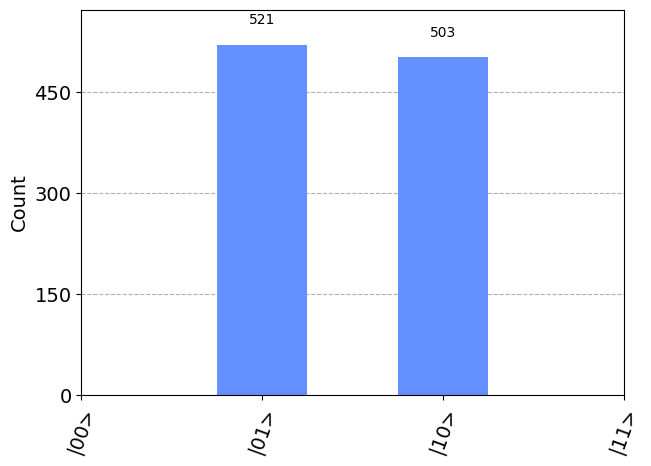

In [4]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Exercise:** Explain the histogram above. Remember that IBM Q puts the result for $q_0$ to the right and $q_1$ to the left

Let's try a different circuit!

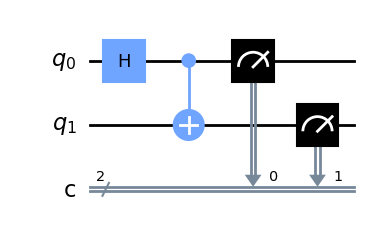

In [5]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

**Exercise:** What states are the qubits in before the measurement? Are they entangled?

In [6]:
sim = True
N_measure = 1024

{'|00>': 504, '|10>': 0, '|01>': 0, '|11>': 520}


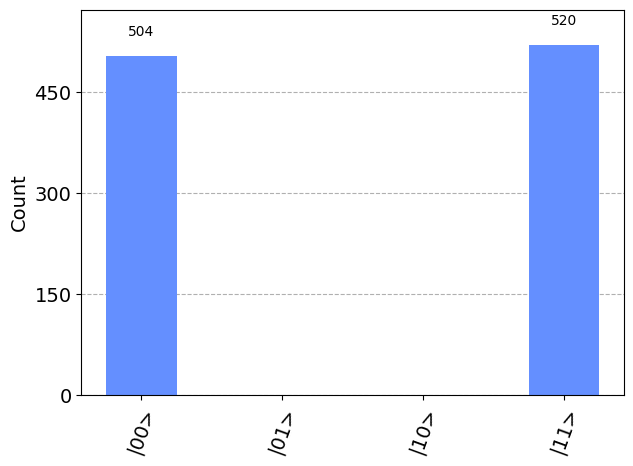

In [7]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Exercise:** Explain the histogram from the state of the qubits.

Now that you've done measurements on entangled qubits, you have a solid foundation for learning how quantum computers are used to solve problems! We will build upon this in the next exercise on Grover's algorithm.

**Bonus exercise:** We'll now construct a similar circuit to the first one in this exercise, apart from the fact that we put the qubits in the state
$$\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$$
before the measurement is performed. Will this impact the result of the measurement? Why or why not?

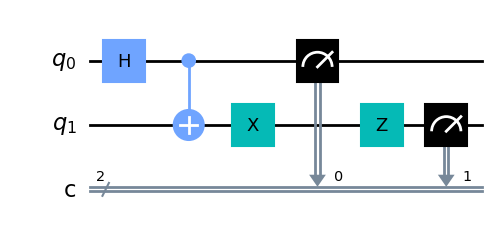

In [8]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.z(1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

In [9]:
sim = True
N_measure = 1024

{'|00>': 0, '|10>': 528, '|01>': 496, '|11>': 0}


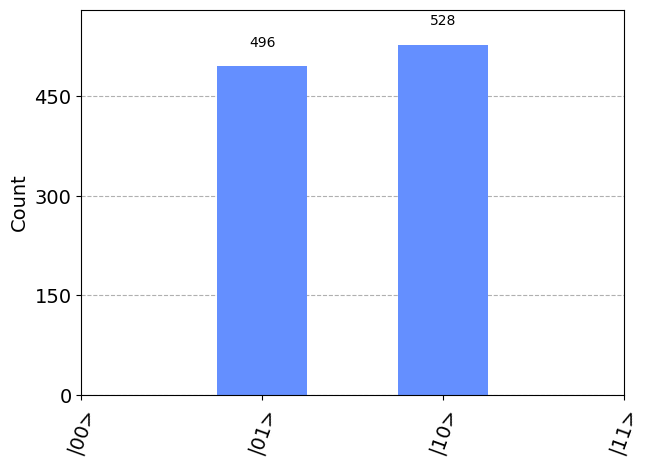

In [10]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)